###  Highest grossing movies in France

data_url = ***https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France***

This	web	page	has	a	table	that	displays	data	about	the	top	50	ilms	in	France	by	revenue,	in	the	year 2018.	We	import	this	data	in	Pandas	using	methods	from	the	Requests	library.	Requests	is	a	Python	library used	for	making	HTTP	requests.	It	helps	with	extracting	HTML	from	web	pages	and	interfacing	with	APIs.

**Questions	that	we	want	to	answer	through	our	analysis:**
1. Identify	the	top	five films by revenue
2. What is the percentage share(revenue) of each of the top ten movies?
3. How the monthly average revenue change during the year?


In [13]:
# importing the needed libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing data from the web page
data_url = "https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France"

req = requests.get(data_url)
data = pd.read_html(req.text)
df = data[0]

In [14]:
# the top five films
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


In [15]:
# informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


### Note: the	data	types	of	the	columns	are	not	in	the	format	we	need
* The	“Gross”	column represents	the	gross	revenue,	which	is	a	numeric	column.	n.	This	column,	however,	has	been	assigned	an	objectc data	type	because	it	contains	numeric	as	well	as	non-numeric	data	(characters	like “,”,	“$”	symbol,	and	letters
like	“U”	and	“S”).

In [16]:
# data summary
df.describe()

,#
count,50.00000
mean,25.50000
std,14.57738
min,1.00000
25%,13.25000
50%,25.50000
75%,37.75000
max,50.00000


### Data Wrangling 
***TODO:**
1. Remove unnecessary characters
2. Change data types
3. Remove Columns that are not needed
4. Create new column from existing column

In [17]:
# removing unnecssary characters from the Gross column
df["Gross"] = df["Gross"].str.replace(r"US$","").str.replace(r",", "")

In [20]:
# changing the datatype of the Gross column to make the column numeric
df["Gross"] = df["Gross"].astype('int64')
# can also use the below
# df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df["Gross"].head()

0     6557062
1     2127871
2     2006033
3     2771269
4    16604101
Name: Gross, dtype: int64

In [22]:
# extracting the months from the dates
df["Date"] = df["Date"].astype("datetime64[ns]")

#creating a new column for the months in relation to the general index
df["Month"] = pd.DatetimeIndex(df["Date"]).month

df["Month"].head()


0    1
1    1
2    1
3    1
4    2
Name: Month, dtype: int32

In [23]:
df.head()

,#,Date,Film,Gross,Notes,Month
0,1,2018-01-07,Star Wars: The Last Jedi,6557062,[1],1
1,2,2018-01-14,Jumanji: Welcome to the Jungle,2127871,[2],1
2,3,2018-01-21,Brillantissime,2006033,[3],1
3,4,2018-01-28,The Post,2771269,[4],1
4,5,2018-02-04,Les Tuche 3,16604101,[5],2


In [26]:
# droping unnecessary features/columns
#df.drop(['#', 'Notes'], axis=1, inplace=True)

df.head() 

,Date,Film,Gross,Month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2


### Visualization

In [35]:
# creating a subset of the main data consisting of Film and Gross
df1 = df[["Film", "Gross"]].sort_values(ascending=False, by="Gross")

# droping the unwanted index added
# df1.drop(["index"], axis=1, inplace=True)

df1.columns

Index(['Film', 'Gross'], dtype='object')

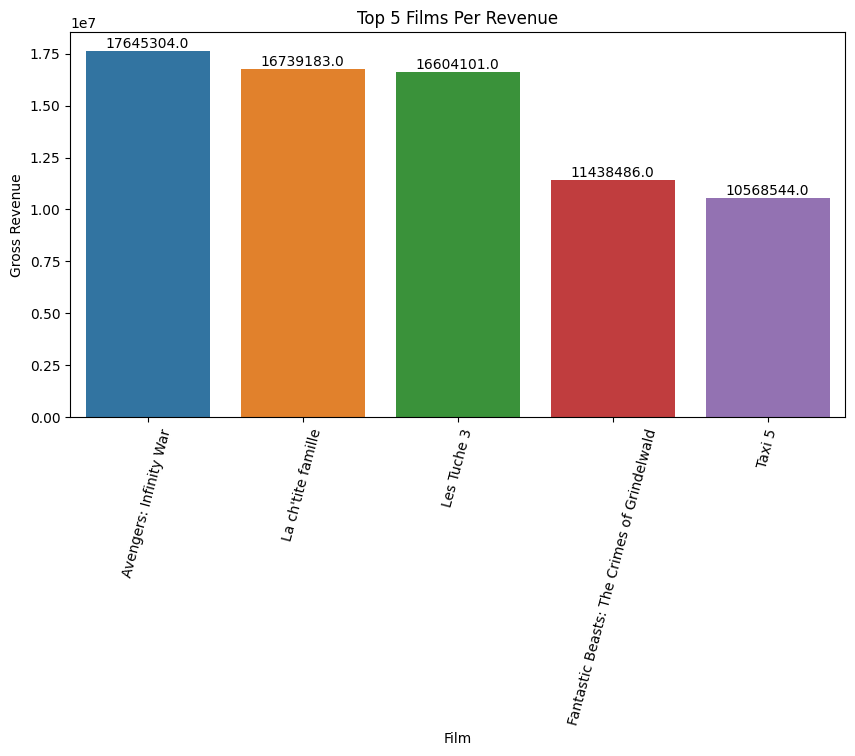

In [38]:
# plotting the top 5 revenue
# setting the figure size
plt.figure(figsize=(10,5))

# creating a bar plot
ax  = sns.barplot(x="Film", y="Gross", data=df1.head())
ax.set_xticklabels(labels=df1.head()["Film"], rotation=75)
ax.set_title("Top 5 Films Per Revenue")
ax.set_ylabel("Gross Revenue")

# labeling the bars
for p in ax.patches:
    ax.annotate(p.get_height(),
                (p.get_x() + p.get_width()/ 2, p.get_height()),
                ha="center", va="bottom")

<Axes: ylabel='Gross'>

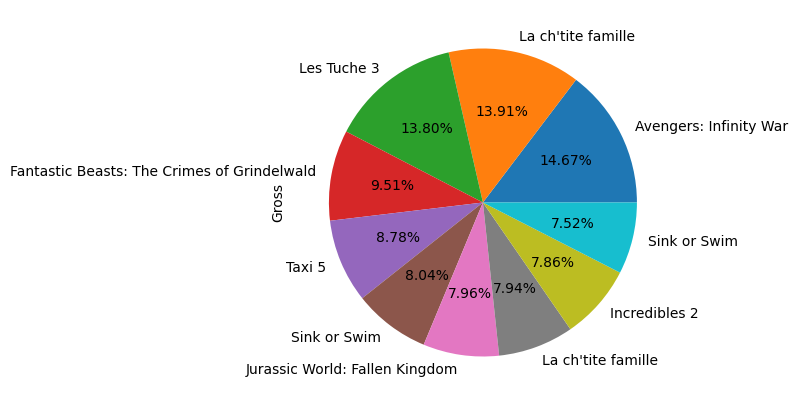

In [39]:
# using pie chart to show top 10 films by percentage in revenue
df1["Gross"].head(10).plot(kind="pie", autopct="%.2f%%", labels=df1['Film'], figsize=(10, 5))

<Axes: xlabel='Month'>

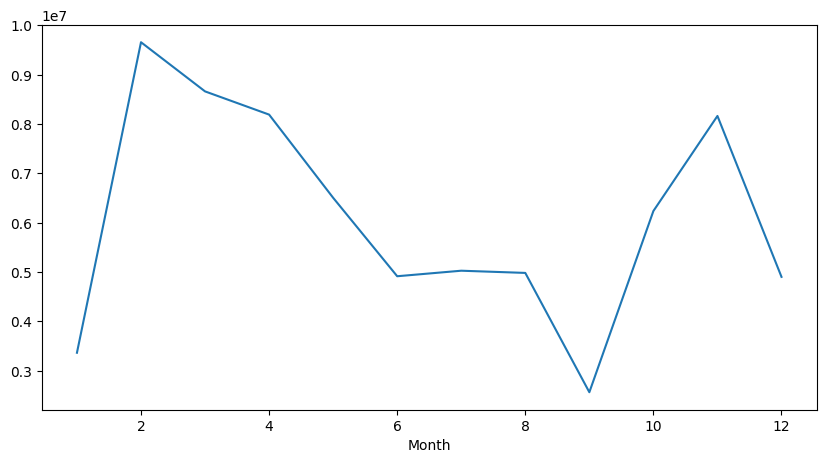

In [40]:
# aggregating the revenues by month
df2 = df.groupby("Month")["Gross"].mean()

# creating a line plot
df2.plot(kind="line", figsize=(10,5))


#### Drawing Inference based on Analysis and Visualization
1. The top three highest-revenue-grossing movies in France in the year 2018 were Avengers, La Ch'tite Famille, and Les Tuche 3.

2. The average monthly revenue shows wide variation, possibly dependent on the month of release of the movies. which may neccessiate futher analysis across the years.